In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import time
import matplotlib.pyplot as plt
import numpy as np  
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img  
from keras.models import Sequential  
from keras.layers import Dropout, Flatten, Dense  
from keras import applications  
from keras.utils.np_utils import to_categorical  
import matplotlib.pyplot as plt  
import matplotlib.image as mpimg
%matplotlib inline
import math  
import cv2  
import datetime

In [2]:
model = tf.keras.models.load_model('cnn_trail_6_best_1.h5')

In [3]:
test_data_dir = ['test_binary1/', 'test_binary2/', 'test_binary3/', 'test_binary4/', 'test_binary5/', 'test_binary6/', 'test_binary7/',
                'test_binary8/', 'test_binary9/', 'test_binary10/', 'test_binary11/', 'test_binary12/', 'test_binary13/', 'test_binary14/',
                'test_binary15/']

In [4]:
test_dataset = []
time_lst = []

precision_lst =[]
accuracy_lst = []
F_1_lst = []
recall_lst = []

fp_lst = []
fn_lst = []
tp_lst = []
tn_lst = []

tnr_lst = []
fnr_lst = []
fpr_lst = []
tpr_lst = []
auc_lst = []

for i in range(len(test_data_dir)):
    test_generator = ImageDataGenerator(rescale=1/255)
    test_data_gen = test_generator.flow_from_directory(test_data_dir[i],
        target_size=(15, 1486),
        batch_size= 64 ,shuffle=False,
        class_mode= 'binary',classes=['0', '1'])
    
    
    
    
    test_steps_per_epoch = np.math.ceil(test_data_gen.samples / test_data_gen.batch_size)
    
    start = time.time()
    predictions = model.predict(test_data_gen, steps=test_steps_per_epoch)
    end = time.time()
    inference_time = ((end-start)/test_data_gen.samples)*0.0001
    
    labels = (predictions > 0.5).astype(int)
    
    true_classes = test_data_gen.classes
    
    class_labels = list(test_data_gen.class_indices.keys())  
    
    report = metrics.classification_report(true_classes, labels, target_names=class_labels, digits=4, output_dict=True)
    
   
    
    macro_precision =  report['1']['precision'] 
    macro_recall = report['1']['recall']    
    macro_f1 = report['1']['f1-score']
    accuracy = report['accuracy']
    
    
    
    
    CM = confusion_matrix(true_classes, labels)
    
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]

    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)
    
    #true negative rate 
    TNR = TN/(TN+FP) 
    #tru positive rate
    TPR = TP/(TP+FN)
    # False negative rate
    FNR = FN/(TP+FN)
    #false positive rate
    FPR = FP/(FP+TN)
    
    auc_score = roc_auc_score(true_classes, labels)
    
    test_dataset.append(i+1)
    
    time_lst.append(inference_time)
    
    accuracy_lst.append(accuracy)
    precision_lst.append(macro_precision)
    recall_lst.append(macro_recall)
    F_1_lst.append(macro_f1)
    
    
    
    fp_lst.append(FP)
    fn_lst.append(FN)
    tp_lst.append(TP)
    tn_lst.append(TN)
    
    tnr_lst.append(TNR)
    fnr_lst.append(FNR)
    tpr_lst.append(TPR)
    fpr_lst.append(FPR)
    auc_lst.append(auc_score)

    


Found 328 images belonging to 2 classes.
Found 328 images belonging to 2 classes.
Found 328 images belonging to 2 classes.
Found 328 images belonging to 2 classes.
Found 328 images belonging to 2 classes.
Found 328 images belonging to 2 classes.
Found 328 images belonging to 2 classes.
Found 328 images belonging to 2 classes.
Found 328 images belonging to 2 classes.
Found 328 images belonging to 2 classes.
Found 328 images belonging to 2 classes.
Found 328 images belonging to 2 classes.
Found 328 images belonging to 2 classes.
Found 328 images belonging to 2 classes.
Found 328 images belonging to 2 classes.


In [8]:
zipped = list(zip(test_dataset, time_lst, accuracy_lst, precision_lst, recall_lst, F_1_lst, tn_lst, fp_lst,
                  fn_lst, tp_lst, tnr_lst, fnr_lst, tpr_lst, fpr_lst, auc_lst))
df = pd.DataFrame(zipped, columns = ['Dataset', 'Inference Time (s)', 'Acc', 'Precision', 'Recall', 'F-1', 'TN', 'FP',
                                    'FN', 'TP', 'TNR', 'FNR', 'TPR', 'FPR', 'AUC Score'])

In [9]:
df
#cnn_trail_6_best_1

,Dataset,Inference Time (s),Acc,Precision,Recall,F-1,TN,FP,FN,TP,TNR,FNR,TPR,FPR,AUC Score
0,1,4.746116e-06,0.743902,0.924731,0.527607,0.671875,158.0,7.0,77.0,86.0,0.957576,0.472393,0.527607,0.042424,0.742592
1,2,7.876681e-08,0.893293,0.963768,0.815951,0.883721,160.0,5.0,30.0,133.0,0.969697,0.184049,0.815951,0.030303,0.892824
2,3,8.690503e-08,0.917683,0.965753,0.865031,0.912621,160.0,5.0,22.0,141.0,0.969697,0.134969,0.865031,0.030303,0.917364
3,4,9.526421e-08,0.954268,0.986842,0.920245,0.952381,163.0,2.0,13.0,150.0,0.987879,0.079755,0.920245,0.012121,0.954062
4,5,1.045768e-07,0.966463,0.987179,0.944785,0.965517,163.0,2.0,9.0,154.0,0.987879,0.055215,0.944785,0.012121,0.966332
5,6,1.114943e-07,0.978659,0.981481,0.975460,0.978462,162.0,3.0,4.0,159.0,0.981818,0.024540,0.975460,0.018182,0.978639
6,7,1.194530e-07,0.978659,0.981481,0.975460,0.978462,162.0,3.0,4.0,159.0,0.981818,0.024540,0.975460,0.018182,0.978639
7,8,1.107648e-07,0.981707,0.975758,0.987730,0.981707,161.0,4.0,2.0,161.0,0.975758,0.012270,0.987730,0.024242,0.981744
8,9,1.097399e-07,0.987805,0.987730,0.987730,0.987730,163.0,2.0,2.0,161.0,0.987879,0.012270,0.987730,0.012121,0.987804
9,10,1.137343e-07,0.981707,0.981595,0.981595,0.981595,162.0,3.0,3.0,160.0,0.981818,0.018405,0.981595,0.018182,0.981707


In [10]:
maxValueIndex = df[['Acc', 'Precision', 'Recall', 'F-1', 'TN',  'TP', 'TNR',  'TPR', 'AUC Score']].idxmax()

In [11]:
maxValueIndex

Acc          8
Precision    8
Recall       7
F-1          8
TN           3
TP           7
TNR          3
TPR          7
AUC Score    8
dtype: int64

In [12]:
minxValueIndex = df[['Inference Time (s)', 'FP', 'FN', 'FNR', 'FPR']].idxmin()

In [13]:
minxValueIndex 

Inference Time (s)    1
FP                    3
FN                    7
FNR                   7
FPR                   3
dtype: int64

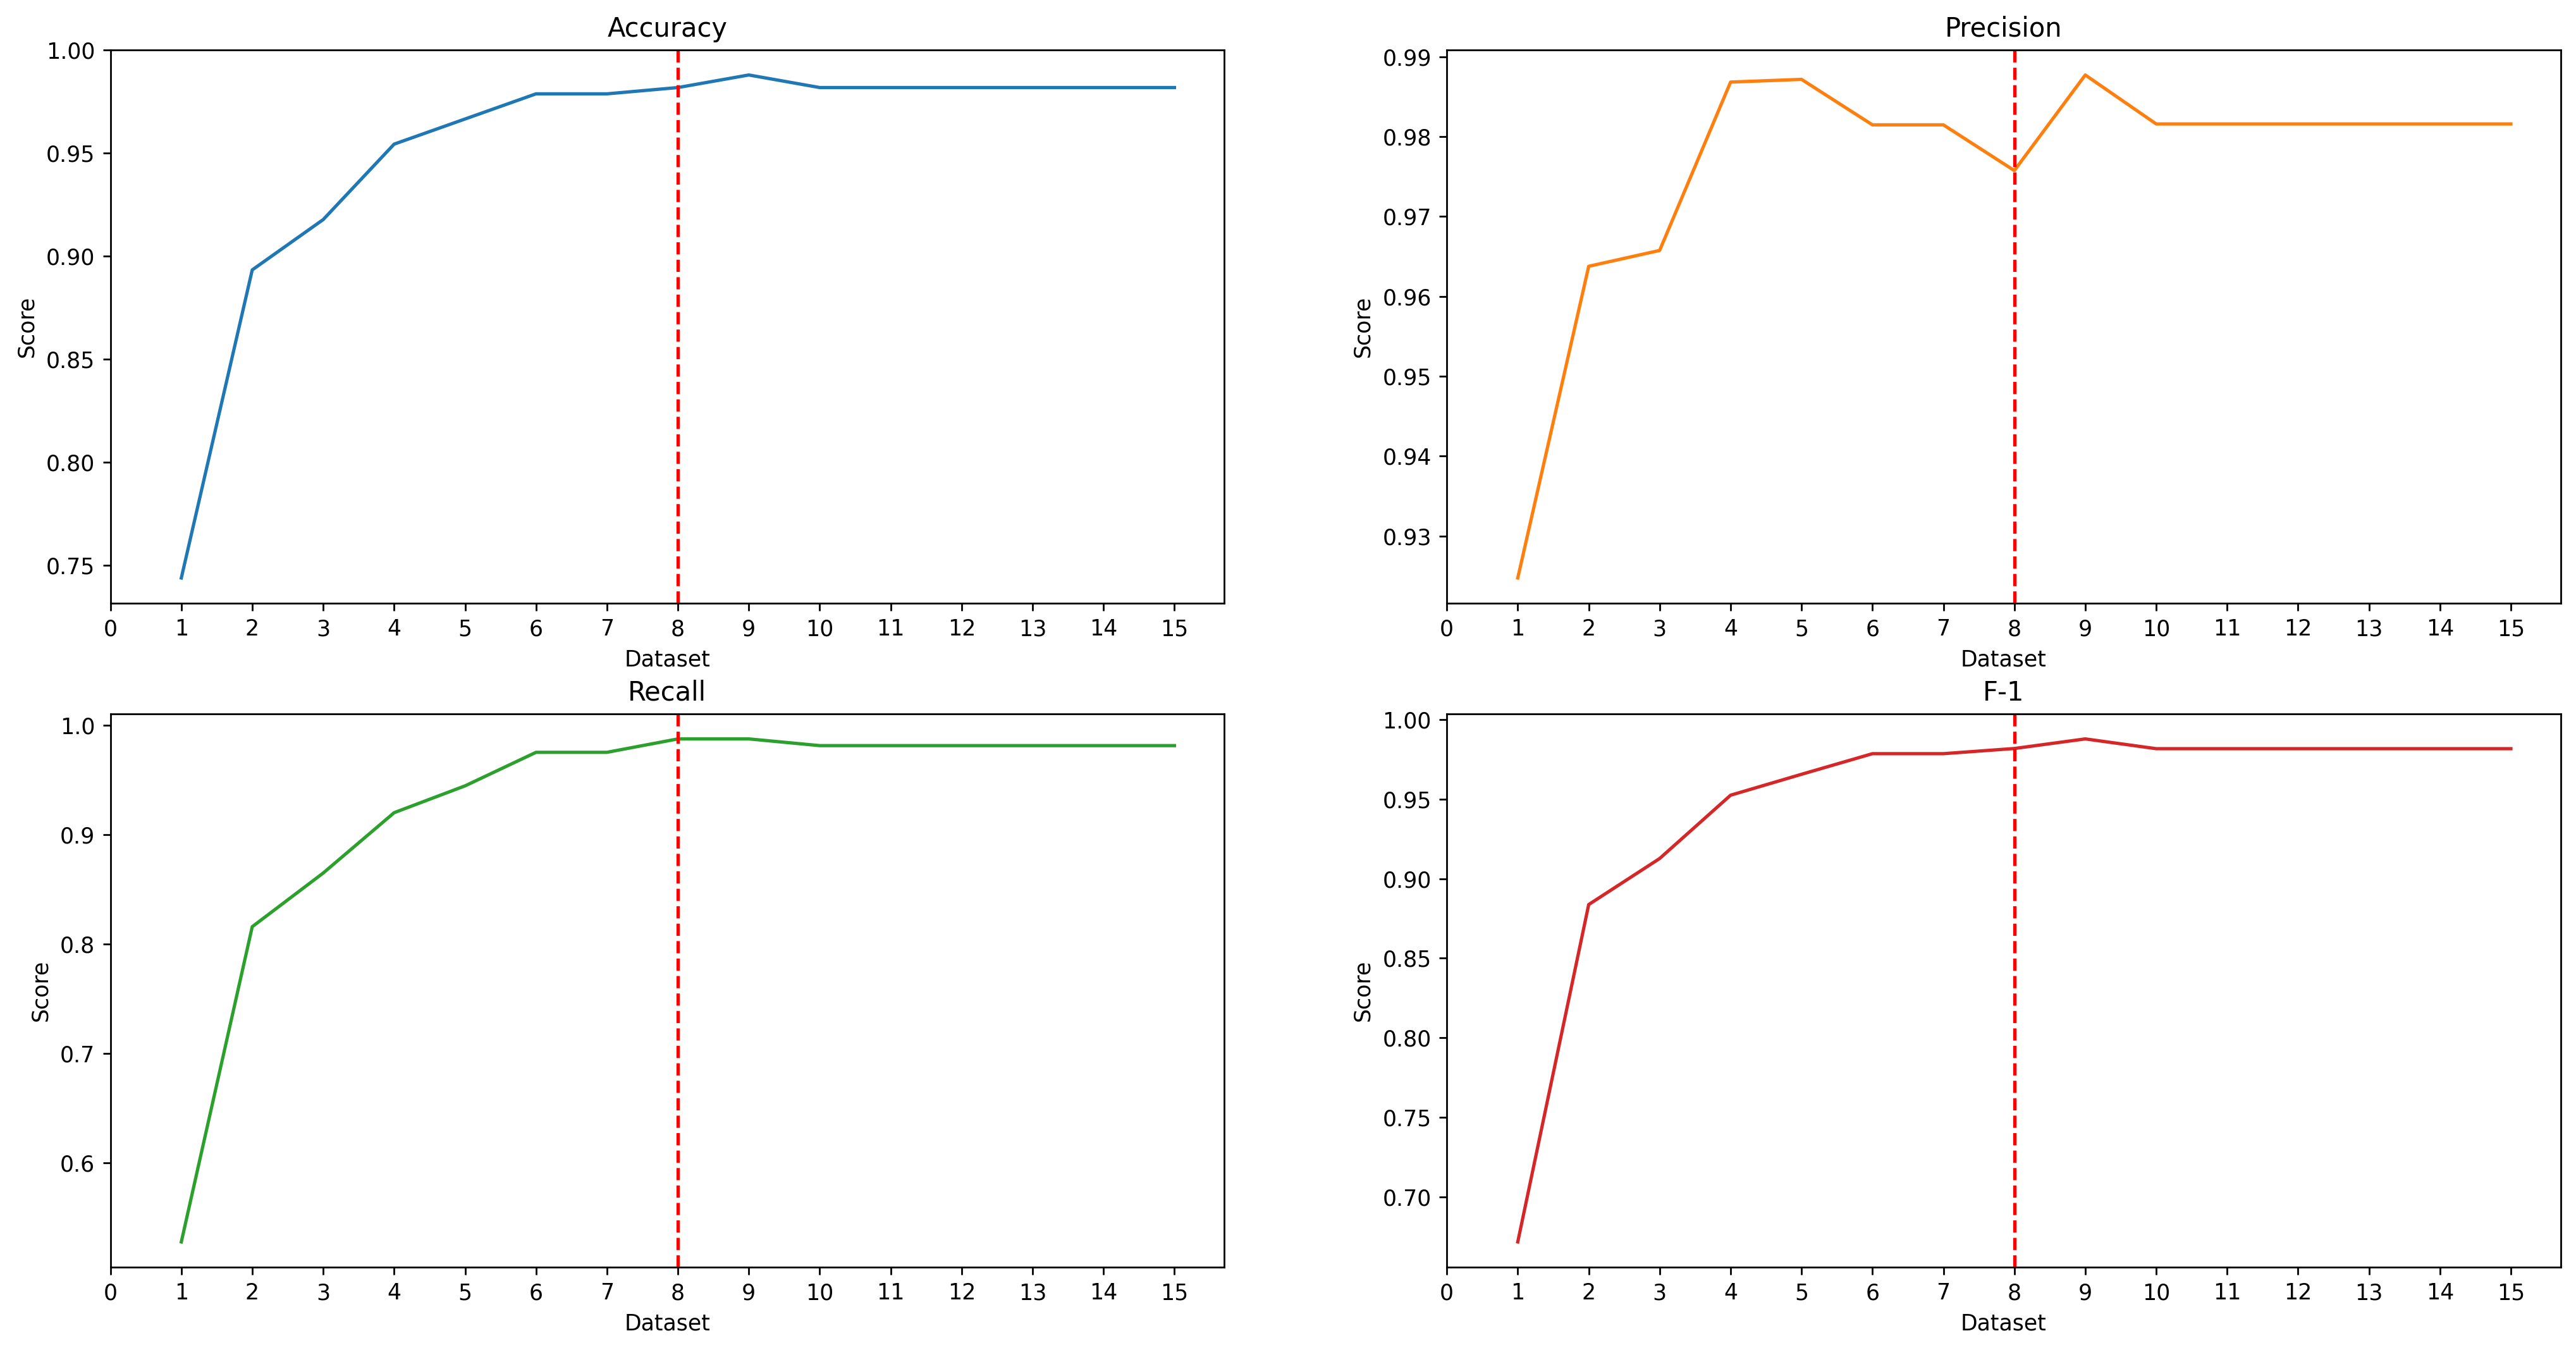

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10), dpi=250)
axs[0, 0].plot(df['Dataset'], df['Acc'])
axs[0, 0].set_title('Accuracy')
axs[0, 1].plot(df['Dataset'], df['Precision'], 'tab:orange')
axs[0, 1].set_title('Precision')
axs[1, 0].plot(df['Dataset'], df['Recall'], 'tab:green')
axs[1, 0].set_title('Recall')
axs[1, 1].plot(df['Dataset'], df['F-1'], 'tab:red')
axs[1, 1].set_title('F-1')




for ax in axs.flat:
    ax.set(xlabel='Dataset', ylabel='Score')
    ax.set_xticks([0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
    ax.axvline(x = [8], color = 'r', linestyle = '--')
   
    

plt.savefig('subplots_metrics_cnn_trail_6_best_1_p_0.5_final.jpg')
# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

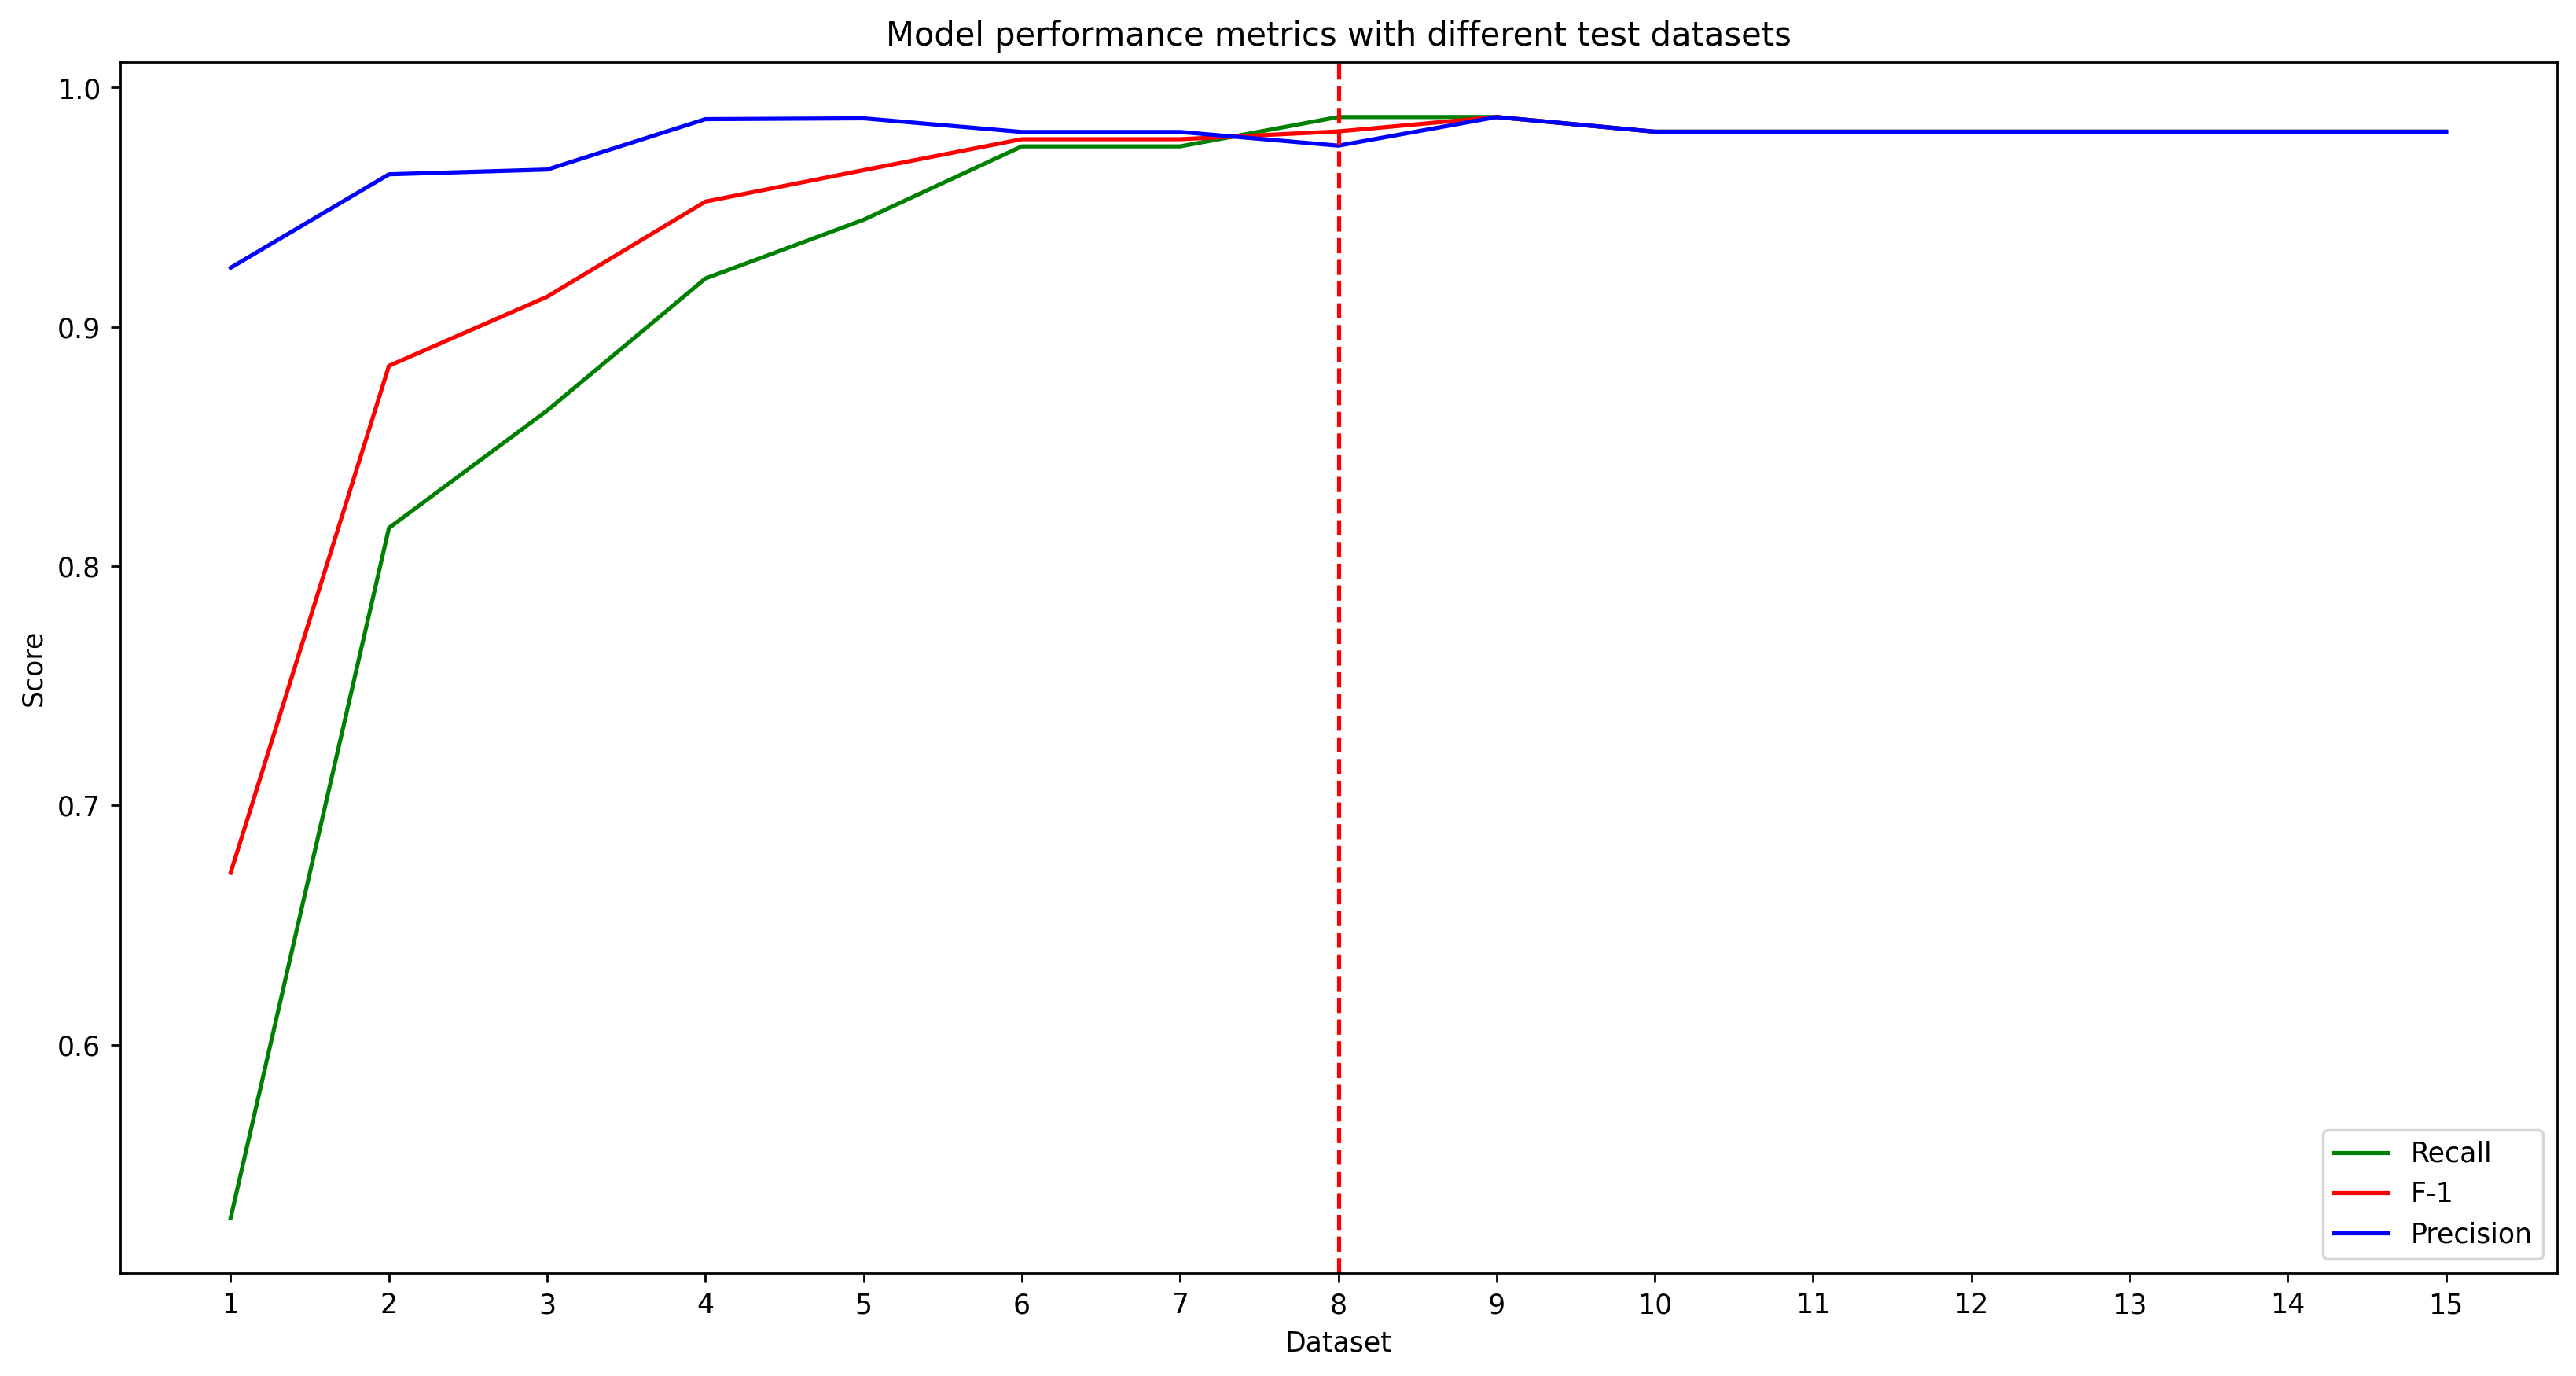

In [15]:
plt.figure(figsize=(16, 8), dpi=250)
ax = plt.axes()

#df['Acc'].plot(label='Accuracy', color='orange')
df['Recall'].plot(label='Recall', color='green')
df['F-1'].plot(label='F-1', color='red')
df['Precision'].plot(label='Precision', color='blue')

plt.axvline(x = 7, color = 'r', linestyle = '--')  
# adding title to the plot
plt.title('Model performance metrics with different test datasets')
 
# adding Label to the x-axis
plt.xlabel('Dataset')
plt.ylabel('Score')  

labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
loc = range(len(labels))

plt.xticks(loc, labels)
#df.plot(ax=ax, xticks=df.index, rot=45)
#ax.set_xticklabels(df.Dataset)
#ax.set_xticks(df.Dataset)
# adding legend to the curve

plt.legend()

plt.savefig('Singleplot_metrics_cnn_trail_6_best_1_p_0.5_final.jpg')

In [16]:
#df = pd.read_csv('results_cnn_trail_6_best_1_final.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'results_cnn_trail_6_best_1_final.csv'

In [ ]:
df

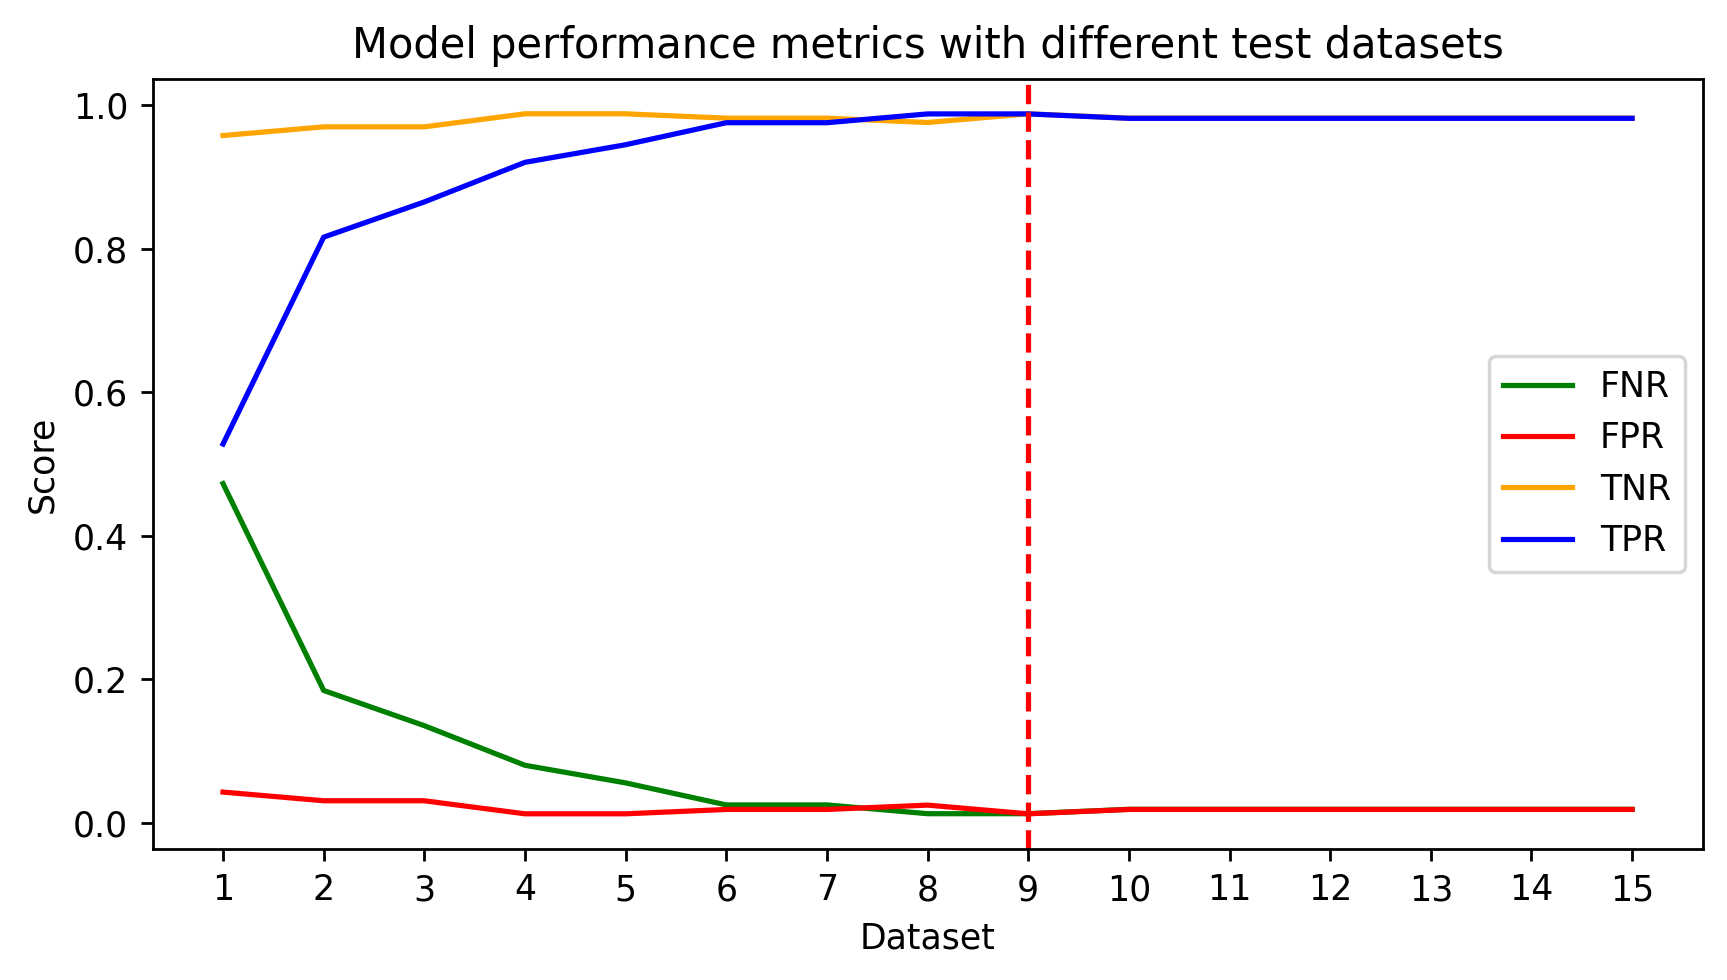

In [17]:
plt.figure(figsize=(8, 4), dpi=250)
ax = plt.axes()

df['FNR'].plot(label='FNR', color='green')
df['FPR'].plot(label='FPR', color='red')
df['TNR'].plot(label='TNR', color='orange')
df['TPR'].plot(label='TPR', color='blue')

plt.axvline(x = 8, color = 'r', linestyle = '--')  
# adding title to the plot
plt.title('Model performance metrics with different test datasets')
 
# adding Label to the x-axis
plt.xlabel('Dataset')
plt.ylabel('Score')  

labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
loc = range(len(labels))

plt.xticks(loc, labels)
#df.plot(ax=ax, xticks=df.index, rot=45)
#ax.set_xticklabels(df.Dataset)
#ax.set_xticks(df.Dataset)
# adding legend to the curve

plt.legend()

plt.savefig('Singleplot_FNR_FPR_metrics_cnn_trail_6_best_1_final.jpg')

In [18]:
df.to_csv('results_cnn_trail_6_best_1_p_0.5_final.csv')

In [107]:
df5 = pd.read_csv('results_cnn_trail_6_best_1.csv')

In [108]:
df2 = pd.read_csv('results_cnn_trail_6_best_1_p_0.2.csv')

In [109]:
df8 = pd.read_csv('results_cnn_trail_6_best_1_p_0.8.csv')

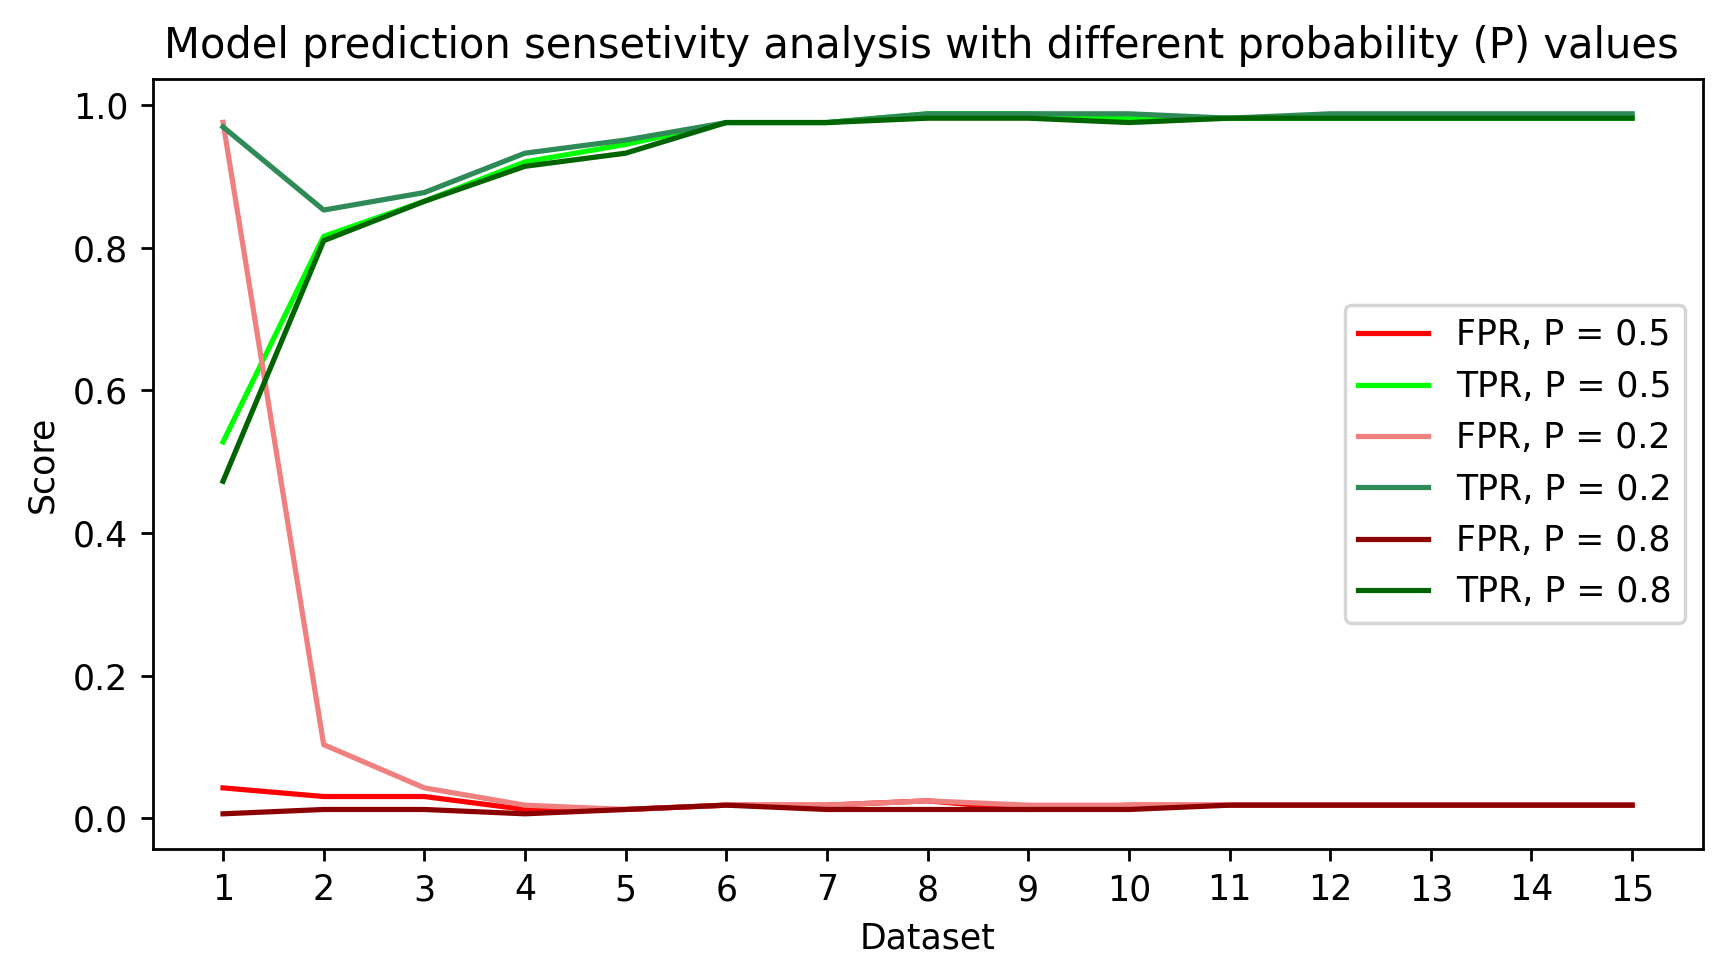

In [110]:
plt.figure(figsize=(8, 4), dpi=250)
ax = plt.axes()

#df5['FNR'].plot(label='FNR, P = 0.5', color='green')
df5['FPR'].plot(label='FPR, P = 0.5', color='red')
#df5['TNR'].plot(label='TNR, P = 0.5', color='orange')
df5['TPR'].plot(label='TPR, P = 0.5', color='lime')

#df2['FNR'].plot(label='FNR, P = 0.2', color='seagreen')
df2['FPR'].plot(label='FPR, P = 0.2', color='lightcoral')
#df2['TNR'].plot(label='TNR, P = 0.2', color='goldenrod')
df2['TPR'].plot(label='TPR, P = 0.2', color='seagreen')

#df8['FNR'].plot(label='FNR, P = 0.8', color='darkgreen')
df8['FPR'].plot(label='FPR, P = 0.8', color='darkred')
#df8['TNR'].plot(label='TNR, P = 0.8', color='darkorange')
df8['TPR'].plot(label='TPR, P = 0.8', color='darkgreen')

#plt.axvline(x = 7, color = 'r', linestyle = '--')  
# adding title to the plot
plt.title('Model prediction sensetivity analysis with different probability (P) values ')
 
# adding Label to the x-axis
plt.xlabel('Dataset')
plt.ylabel('Score')  

labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
loc = range(len(labels))

plt.xticks(loc, labels)
#df.plot(ax=ax, xticks=df.index, rot=45)
#ax.set_xticklabels(df.Dataset)
#ax.set_xticks(df.Dataset)
# adding legend to the curve

plt.legend()

plt.savefig('Singleplot_FNR_FPR_metrics_cnn_trail_6_best_1_all_p_values.jpg')